In [62]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline

In [64]:
credentials = ServiceAccountCredentials.from_json_keyfile_name(
    "../../gckey.json",
    [
        "https://spreadsheets.google.com/feeds",
        "https://www.googleapis.com/auth/drive",
    ],
)
client = gspread.authorize(credentials)
spreadsheet = client.open("MaLA data mixing ablation")
Belebele_Llama_Selfish = spreadsheet.worksheet("Belebele-3shots-Llama-3.1-8B-Selfish")

In [65]:
Belebele_Llama_Selfish_Data = Belebele_Llama_Selfish.get_all_records(value_render_option="UNFORMATTED_VALUE")
df = pd.DataFrame(Belebele_Llama_Selfish_Data, columns=Belebele_Llama_Selfish_Data[0])
df = df.replace('', np.nan)

/tmp/ipykernel_2956510/4138139152.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('', np.nan)


In [66]:
df

,Languages,Model,checkpoint-500,checkpoint-1000,checkpoint-1500,checkpoint-2000,checkpoint-2500,checkpoint-3000,checkpoint-3500,checkpoint-4000,checkpoint-4500
0,All,Llama-3.1-8B-Bilingual-Selfish,0.397750,0.360000,0.30055,0.327775,0.294175,0.290550,0.30110,NaN,NaN
1,All,Llama-3.1-8B-Bilingual-Code-Selfish,0.418325,0.410275,0.36915,0.358050,0.400550,0.381125,0.38665,0.3800,0.38055
2,All,Llama-3.1-8B-Monolingual-Selfish,0.477750,0.476375,0.46945,0.444175,0.458600,0.461950,NaN,NaN,NaN
3,All,Llama-3.1-8B-Monolingual-Code-Selfish,0.458875,0.437225,0.44695,0.443925,0.396350,0.442225,0.43720,NaN,NaN
4,High,Llama-3.1-8B-Bilingual-Selfish,0.571100,0.506700,0.38220,0.417800,0.357800,0.333300,0.35000,NaN,NaN
5,High,Llama-3.1-8B-Bilingual-Code-Selfish,0.654400,0.618900,0.53670,0.512200,0.591100,0.555600,0.56110,0.5467,0.56110
6,High,Llama-3.1-8B-Monolingual-Selfish,0.724400,0.694400,0.67780,0.653300,0.684400,0.691100,NaN,NaN,NaN
7,High,Llama-3.1-8B-Monolingual-Code-Selfish,0.684400,0.660000,0.60780,0.605600,0.554400,0.630000,0.62220,NaN,NaN
8,Medium,Llama-3.1-8B-Bilingual-Selfish,0.323300,0.283300,0.24000,0.262200,0.230000,0.240000,0.23890,NaN,NaN
9,Medium,Llama-3.1-8B-Bilingual-Code-Selfish,0.307800,0.318900,0.27330,0.283300,0.306700,0.305600,0.30440,0.3111,0.28780


In [67]:
df_dropped = df.drop(columns=["Languages"])
df_all, df_high, df_medium, df_low = [df_dropped.iloc[i:i+4] for i in range(0, len(df_dropped), 4)]

In [68]:
df_all

,Model,checkpoint-500,checkpoint-1000,checkpoint-1500,checkpoint-2000,checkpoint-2500,checkpoint-3000,checkpoint-3500,checkpoint-4000,checkpoint-4500
0,Llama-3.1-8B-Bilingual-Selfish,0.397750,0.360000,0.30055,0.327775,0.294175,0.290550,0.30110,NaN,NaN
1,Llama-3.1-8B-Bilingual-Code-Selfish,0.418325,0.410275,0.36915,0.358050,0.400550,0.381125,0.38665,0.38,0.38055
2,Llama-3.1-8B-Monolingual-Selfish,0.477750,0.476375,0.46945,0.444175,0.458600,0.461950,NaN,NaN,NaN
3,Llama-3.1-8B-Monolingual-Code-Selfish,0.458875,0.437225,0.44695,0.443925,0.396350,0.442225,0.43720,NaN,NaN


In [69]:
model_info = {
    "Llama-3.1-8B-Bilingual-Code-Selfish": {
        "final_ckpt": 4500,
        "total_tokens": 300e6,  # 300M
    },
    "Llama-3.1-8B-Monolingual-Code-Selfish": {
        "final_ckpt": 3500,
        "total_tokens": 300e6,  # 300M
    },
    "Llama-3.1-8B-Bilingual-Selfish": {
        "final_ckpt": 3500, 
        "total_tokens": 200e6   # 200M
    },  
    "Llama-3.1-8B-Monolingual-Selfish": {
        "final_ckpt": 3000,
        "total_tokens": 200e6,  # 200M
    },
}


def ckpt_to_tokens(model_name: str, ckpt: int) -> float:
    """
    Given model name and checkpoint numbers, return the corresponding number of trained tokens.
    """
    info = model_info[model_name]
    final_ckpt = info["final_ckpt"]
    total_tokens = info["total_tokens"]
    if ckpt > final_ckpt:
        ckpt = final_ckpt

    return ckpt * (total_tokens / final_ckpt)

checkpoint_cols = [col for col in df.columns if col.startswith("checkpoint-")]

In [70]:
def vis(df, langs_catagory, base_score):
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(10, 6), dpi=120)

    for i, row in df.iterrows():
        model_name = row["Model"]
        if model_name not in model_info:
            continue

        ckpt_bleu_pairs = []
        for col in checkpoint_cols:
            val = row[col]
            if pd.notna(val) and val != "":
                ckpt = int(col.split("-")[1])
                x_tokens = ckpt_to_tokens(model_name, ckpt)
                y_bleu = float(val)
                ckpt_bleu_pairs.append((x_tokens, y_bleu))

        ckpt_bleu_pairs.sort(key=lambda x: x[0])

        xs = [p[0] for p in ckpt_bleu_pairs]
        ys = [p[1] for p in ckpt_bleu_pairs]

        plt.plot(
            xs, ys, marker="o", linestyle="-", linewidth=2, markersize=5, label=model_name
        )

    plt.axhline(y=base_score, color='red', linestyle='--', linewidth=1.5, label=f"Llama-3.1-8B Base")

    plt.xlabel("Training Tokens", fontsize=12)
    plt.ylabel("Acc", fontsize=12)
    plt.title(f"Acc({langs_catagory}) vs. Training Tokens", fontsize=14, fontweight="bold")

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(loc="lower right", fontsize=10)
    plt.tight_layout()

    plt.show()

In [71]:
def vis_smooth(df, langs_catagory, base_score):
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(10, 6), dpi=120)

    for i, row in df.iterrows():
        model_name = row["Model"]
        if model_name not in model_info:
            continue

        ckpt_bleu_pairs = []
        for col in checkpoint_cols:
            val = row[col]
            if pd.notna(val) and val != "":
                ckpt = int(col.split("-")[1])
                x_tokens = ckpt_to_tokens(model_name, ckpt)
                y_bleu = float(val)
                ckpt_bleu_pairs.append((x_tokens, y_bleu))

        ckpt_bleu_pairs.sort(key=lambda x: x[0])

        xs = np.array([p[0] for p in ckpt_bleu_pairs])
        ys = np.array([p[1] for p in ckpt_bleu_pairs])

        # Smoothing the curve
        if len(xs) > 2:  # Ensure sufficient points for smoothing
            x_smooth = np.linspace(xs.min(), xs.max(), 200)
            spline = make_interp_spline(xs, ys, k=3)  # k=3 for cubic spline
            y_smooth = spline(x_smooth)

            # Calculate stderr (replace with actual stderr calculation if available)
            stderr = np.std(ys) / np.sqrt(len(ys))
            y_lower = y_smooth - stderr
            y_upper = y_smooth + stderr

            # Plot smooth curve and stderr
            plt.plot(x_smooth, y_smooth, label=model_name, linewidth=2)
            plt.fill_between(x_smooth, y_lower, y_upper, alpha=0.2)
        else:
            # Plot raw data if not enough points for smoothing
            plt.plot(xs, ys, marker="o", linestyle="-", linewidth=2, markersize=5, label=model_name)

    plt.axhline(y=base_score, color='red', linestyle='--', linewidth=1.5, label=f"Llama-3.1-8B Base")

    plt.xlabel("Training Tokens", fontsize=12)
    plt.ylabel("Acc", fontsize=12)
    plt.title(f"Acc({langs_catagory}) vs. Training Tokens", fontsize=14, fontweight="bold")

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(loc="lower right", fontsize=9)
    plt.tight_layout()

    plt.show()

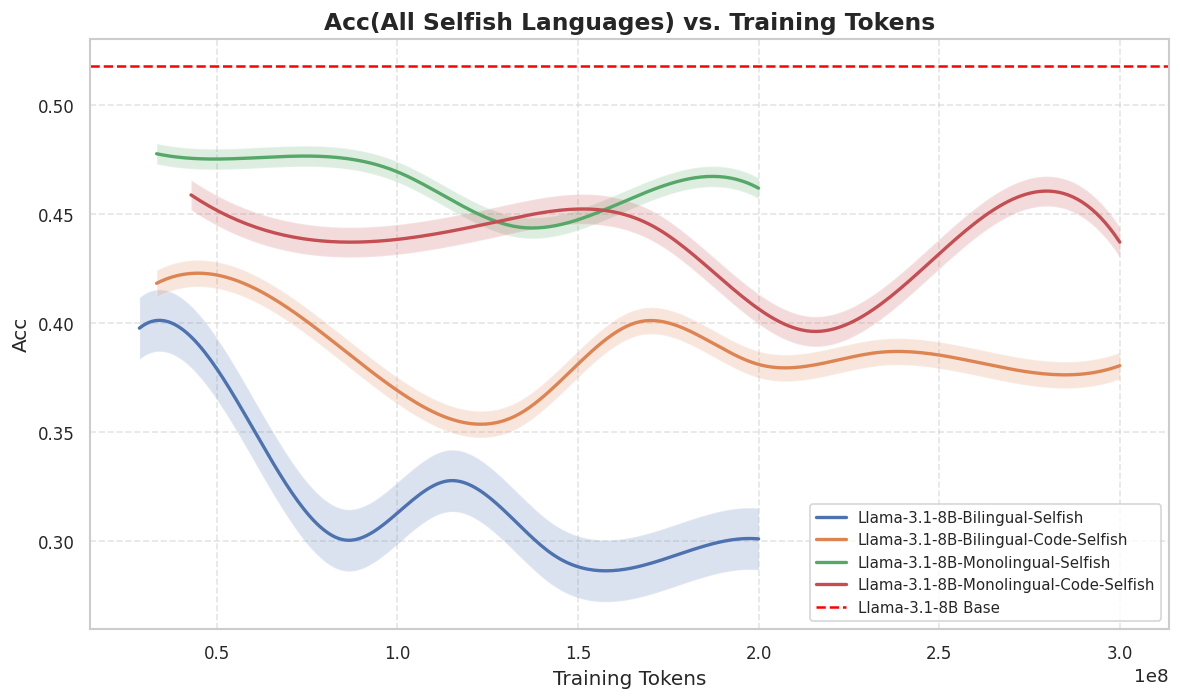

In [72]:
vis_smooth(df_all, "All Selfish Languages", 0.518)

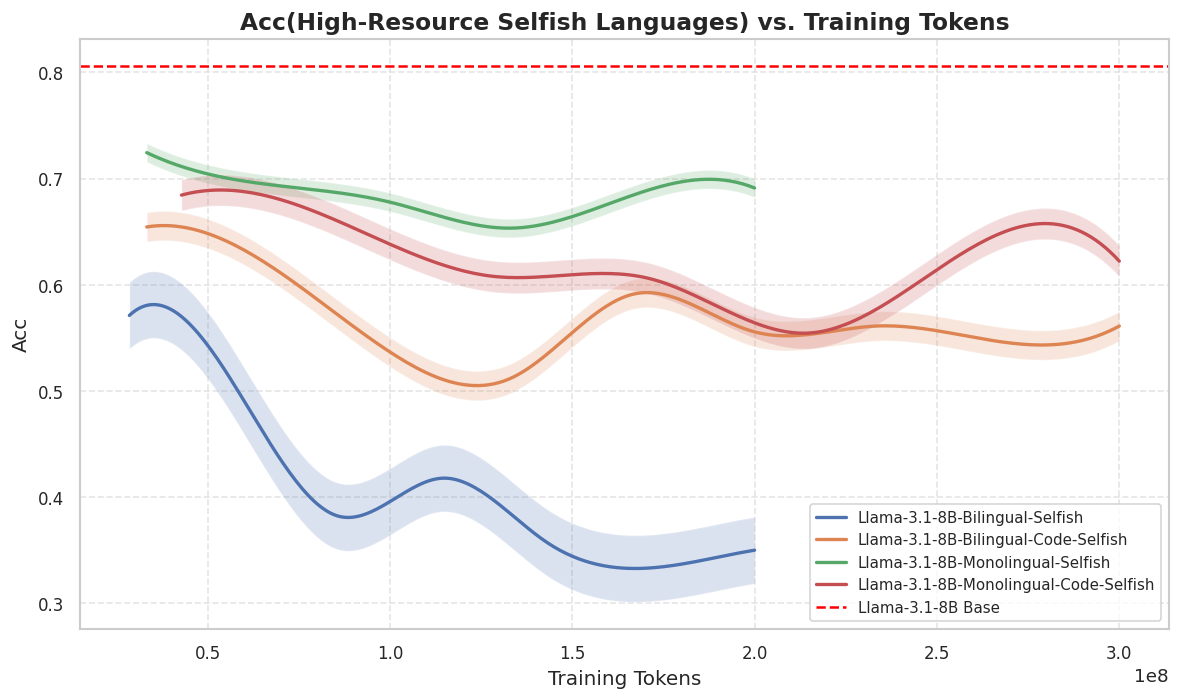

In [73]:
vis_smooth(df_high, "High-Resource Selfish Languages", 0.806)

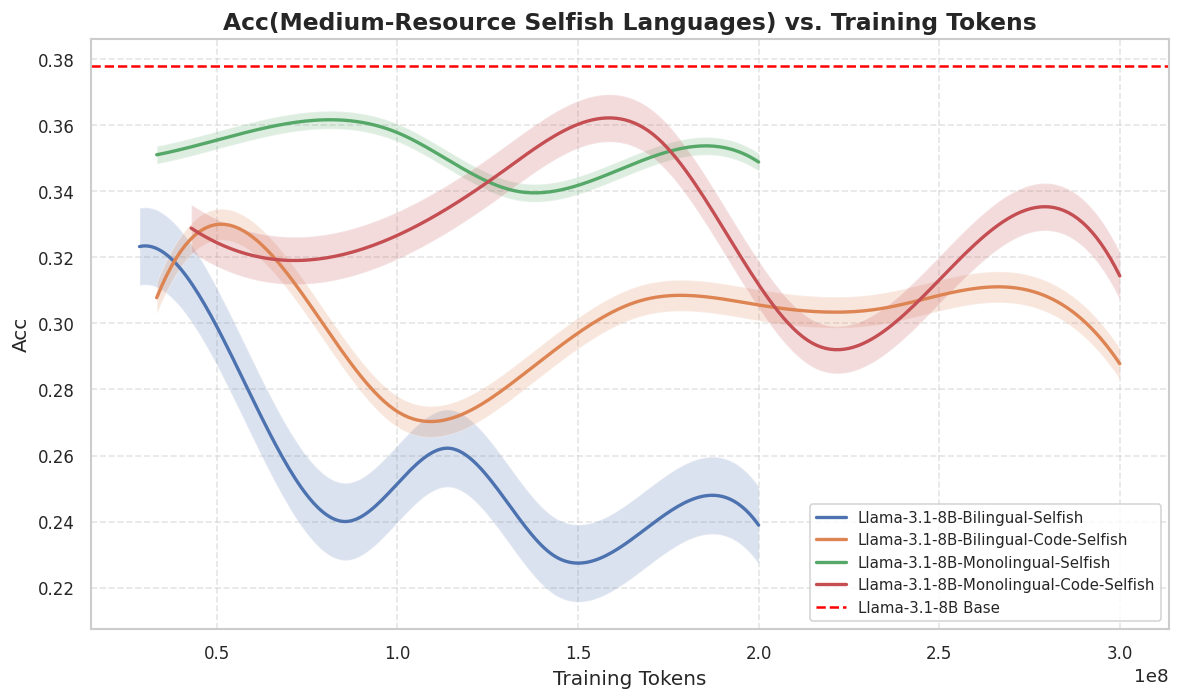

In [74]:
vis_smooth(df_medium, "Medium-Resource Selfish Languages", 0.378)

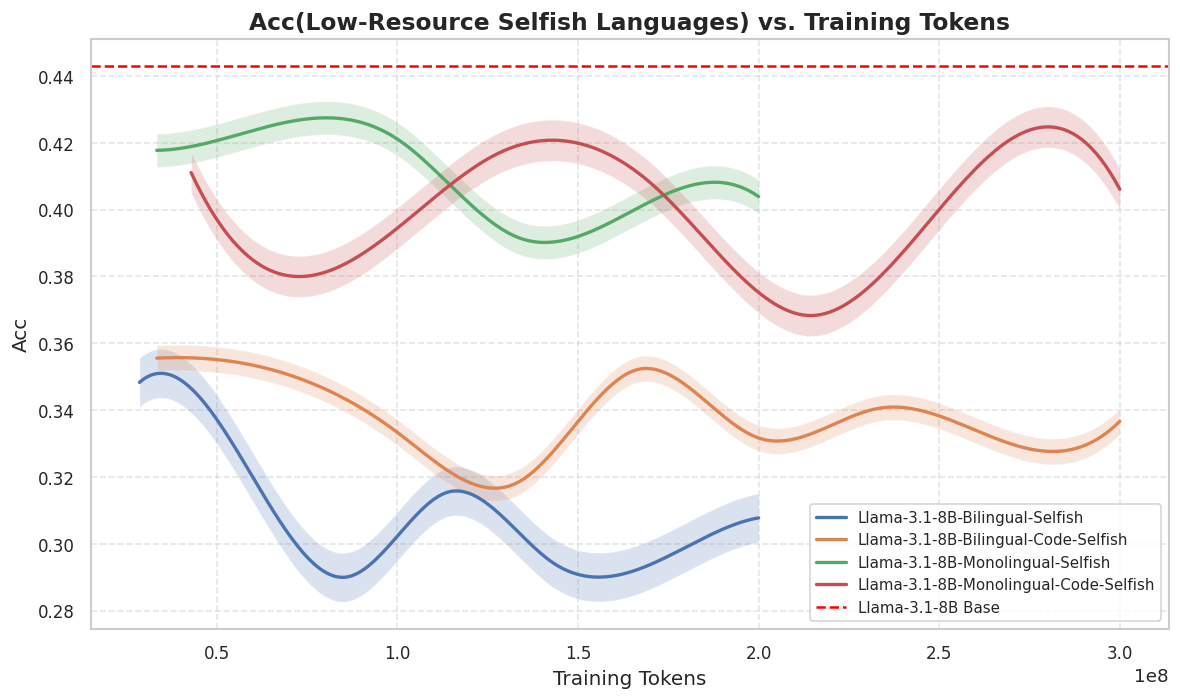

In [75]:
vis_smooth(df_low, "Low-Resource Selfish Languages", 0.443)